In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
satis = pd.read_excel("svm_data.xlsx", sheet_name="satış_miktarı")
#alis = pd.read_excel("data en en temiz hali arttık.xlsx", sheet_name="alış_miktarı")

In [47]:
satis.head()

,satis_miktari,tarihler,gecen ay,bu ay
0,242,2013-01-01,NaN,242
1,252,2013-02-01,242.0,252
2,200,2013-03-01,252.0,200
3,360,2013-04-01,200.0,360
4,228,2013-05-01,360.0,228


In [48]:
satis.tail()
satis.drop([0],axis=0, inplace=True)

In [49]:
satis.tail()

,satis_miktari,tarihler,gecen ay,bu ay
19,350,2014-08-01,277.0,350
20,452,2014-09-01,350.0,452
21,320,2014-10-01,452.0,320
22,401,2014-11-01,320.0,401
23,362,2014-12-01,401.0,362


In [50]:
satis['tarihler'] = pd.to_datetime(satis['tarihler'],infer_datetime_format=True) #convert from string to datetime
indexedDataset = satis.set_index(['tarihler'])
indexedDataset.head(5)

,satis_miktari,gecen ay,bu ay
tarihler,,,
2013-02-01,252,242.0,252
2013-03-01,200,252.0,200
2013-04-01,360,200.0,360
2013-05-01,228,360.0,228
2013-06-01,225,228.0,225


In [51]:
satis["tarihler"] = pd.to_numeric(satis["tarihler"], errors = "coerce")

In [52]:
t = pd.DataFrame()
t["date"] = indexedDataset.index
t["satis"] = satis["satis_miktari"]

In [53]:
t.drop([0],axis=0, inplace=True)
len(t)

22

<BarContainer object of 22 artists>

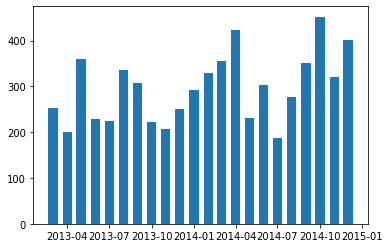

In [54]:
plt.bar(t["date"], t["satis"], width=20) # datanın grafiği

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X = satis[["bu ay","gecen ay"]]
y = satis["satis_miktari"]

In [57]:
#X.reshape(-1, 1)

#y.reshape(-1,1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=101)

In [59]:
from sklearn.svm import SVR

In [60]:
model = SVR()


In [61]:
model.fit(X_train,y_train)

SVR()

In [62]:
predictions = model.predict(X_test)

In [63]:
predictions # gridden önceki tahminler

array([290.12362135, 290.5520082 , 291.43492762, 294.0805677 ,
       287.73917667, 292.34745701, 291.94715176])

In [64]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 69.64295510434536
MSE: 7134.209433602054
RMSE: 84.46424944082587


# GRID SEARCH

In [65]:
param_grid = {'C': [0.1,1, 10,100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

In [68]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [69]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [70]:
grid.best_estimator_

SVR(C=1000, gamma=0.0001)

In [71]:
grid_predictions = grid.predict(X_test)

In [73]:
print('MAE:', metrics.mean_absolute_error(y_test, grid_predictions))
print('MSE:', metrics.mean_squared_error(y_test, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, grid_predictions)))

MAE: 12.685508505279829
MSE: 323.1768735733421
RMSE: 17.97712083658955


In [74]:
from sklearn.metrics import mean_absolute_percentage_error

In [75]:
mape = mean_absolute_percentage_error(y_test, grid_predictions)
mape

0.042382695844612274

In [76]:
grid_predictions # grid ile bulunan dogru parametrelerle yapılan tahminler

array([266.35704427, 292.30223741, 317.4807501 , 398.82136878,
       215.10459531, 422.704238  , 347.74976994])

In [77]:
y_test.values

array([232, 292, 320, 401, 223, 452, 360])

In [78]:
# MAD
to = 0
for i in range(len(y_test)):
    to += abs(y_test.values[i] - grid_predictions[i])
to /= len(y_test)
to

12.685508505279829

In [79]:
tmp = pd.DataFrame()
tmp["y_test"] = y_test.values
tmp["predictions"] = grid_predictions

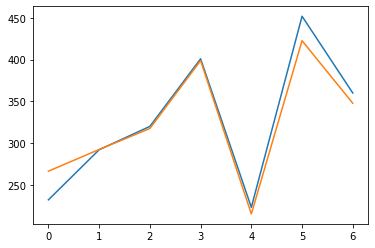

In [80]:
plt.plot(tmp) # mavi test datası turuncu tahminler

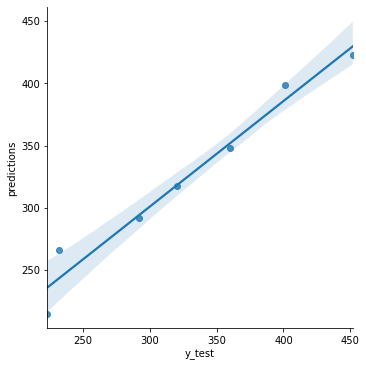

In [81]:
# regresyon grafiği tahminlerin
sns.lmplot(x='y_test',y='predictions',data=tmp)

In [82]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
#X_test = np.array(X_test).reshape(-1, 1)
x_train = scx.fit_transform(X_train)
x_test = scx.transform(X_test)
y_train = scy.fit_transform(y_train)
y_test = scy.transform(y_test)


y_pred = np.array(scy.inverse_transform(grid_predictions))
y_pred = y_pred.reshape(-1,1)
x_test = np.array(scx.inverse_transform(X_test))



#Predict the future values by entering number of days since onset  

y_pred = scy.inverse_transform(grid.predict(scx.transform([[12]])))
print(y_pred)

ValueError: Expected 2D array, got 1D array instead:
array=[228. 200. 187. 355. 252. 336. 350. 225. 206. 423. 250. 302. 362. 308.
 277. 329.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [83]:
array=[228., 200. ,187., 355., 252. ,336., 350., 225., 206., 423., 250., 302., 362., 308.,
 277., 329.]

In [84]:
# forecast